In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/Final preprocessed data.csv')

In [4]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,Smoking_intensity,latitude,longitude,altitude,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,Non-smoker,47.275410,8.489700,749.0,Low Altitude,350.83,37.07,11.35,73.50,No data
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,Non-smoker,37.498890,126.783060,15.0,Low Altitude,501.31,72.37,11.16,68.82,0.002
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,Light smoker,37.474580,126.680240,10.0,Low Altitude,467.17,20.37,11.28,72.08,0.29
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,Non-smoker,37.548639,126.682664,38.0,Low Altitude,320.15,24.40,10.92,72.40,0.0049
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,Non-smoker,37.498890,126.783060,15.0,Low Altitude,320.15,9.08,11.16,68.82,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,Non-smoker,37.512130,126.785189,21.0,Low Altitude,258.81,19.83,11.16,68.82,0.34
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,Non-smoker,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,No data
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,Light smoker,34.621465,135.533049,8.0,Low Altitude,258.81,19.83,11.16,68.82,No data
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Light smoker,37.498890,126.783060,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude',
       'altitude', 'Altitude_Category', 'Average C.PEFR',
       'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI'],
      dtype='object')

In [6]:
columns = ['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA',
           'latitude', 'longitude', 'altitude', 'Average C.PEFR',
           'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI']


In [19]:
df['Asthma']='yes'

In [20]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Cluster,Age_Group,Age_Group_Numeric,Asthma
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,Low Altitude,501.31,72.37,11.16,68.82,0.0020,0,Elderly,3,yes
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,Low Altitude,467.17,20.37,11.28,72.08,0.2900,0,Elderly,3,yes
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,Low Altitude,320.15,24.40,10.92,72.40,0.0049,1,Middle-aged,2,yes
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,Low Altitude,320.15,9.08,11.16,68.82,0.0020,1,Middle-aged,2,yes
5,5,SB-006,14004499,BC3766091,64,M,ES,17,172,80,...,Low Altitude,443.61,37.22,11.49,62.40,0.0054,1,Elderly,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,SB-130,14001501,BC3457672,69,F,ES,10,165,75,...,Low Altitude,258.81,19.83,11.16,68.82,0.0365,1,Elderly,3,yes
107,107,SB-132,14001232,BC3414119,61,F,NS,0,154,40,...,Low Altitude,258.81,19.83,11.16,68.82,0.3500,1,Elderly,3,yes
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,Low Altitude,258.81,19.83,11.16,68.82,0.3400,1,Elderly,3,yes
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Low Altitude,258.81,19.83,11.16,68.82,0.0020,1,Elderly,3,yes


In [21]:
df.tail()

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Cluster,Age_Group,Age_Group_Numeric,Asthma
105,105,SB-130,14001501,BC3457672,69,F,ES,10,165,75,...,Low Altitude,258.81,19.83,11.16,68.82,0.0365,1,Elderly,3,yes
107,107,SB-132,14001232,BC3414119,61,F,NS,0,154,40,...,Low Altitude,258.81,19.83,11.16,68.82,0.3500,1,Elderly,3,yes
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,Low Altitude,258.81,19.83,11.16,68.82,0.3400,1,Elderly,3,yes
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,Low Altitude,258.81,19.83,11.16,68.82,0.0020,1,Elderly,3,yes
113,113,SB-141,14000223,BC3294749,71,F,NS,0,162,73,...,Low Altitude,258.81,19.83,11.16,68.82,0.0020,1,Elderly,3,yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 1 to 113
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               97 non-null     int64   
 1   ID                       97 non-null     object  
 2   BCODE                    97 non-null     object  
 3   UID1                     97 non-null     object  
 4   Age                      97 non-null     int64   
 5   Sex                      97 non-null     object  
 6   Smoke                    97 non-null     object  
 7   Smoke_amount             97 non-null     int64   
 8   Height                   97 non-null     int64   
 9   Weight                   97 non-null     int64   
 10  BMI                      97 non-null     float64 
 11  BSA                      97 non-null     float64 
 12  occupation               97 non-null     object  
 13  occupation_english       97 non-null     object  
 14  address         

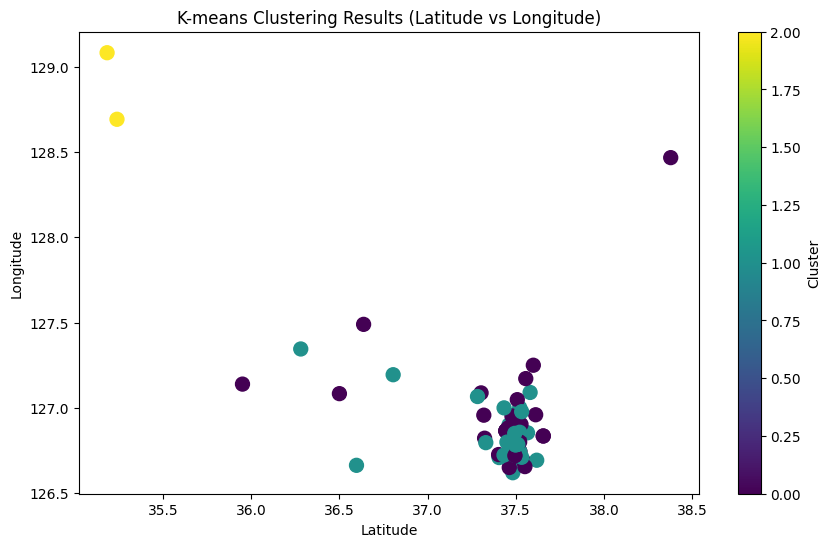

         ID   latitude   longitude  altitude  Cluster
1    SB-002  37.498890  126.783060      15.0        0
2    SB-003  37.474580  126.680240      10.0        1
3    SB-004  37.548639  126.682664      38.0        0
4    SB-005  37.498890  126.783060      15.0        1
5    SB-006  37.581780  127.090340      33.0        1
..      ...        ...         ...       ...      ...
105  SB-130  37.450230  126.799080      32.0        1
107  SB-132  37.495180  126.720070      17.0        0
109  SB-135  37.512130  126.785189      21.0        1
112  SB-140  37.498890  126.783060      15.0        1
113  SB-141  37.498890  126.783060      15.0        1

[97 rows x 5 columns]


In [23]:
import numpy as np

# Selecting relevant numeric columns for clustering
numeric_columns = ['Age', 'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA',
                   'latitude', 'longitude', 'altitude', 'Average C.PEFR',
                   'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI']

# Replacing non-numeric values with NaN and converting columns to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling missing values: Drop rows with missing values in key numeric columns
df = df.dropna(subset=numeric_columns)

# Extracting only numeric columns for clustering
X = df[numeric_columns]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['longitude'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("K-means Clustering Results (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster")
plt.show()

# Displaying the clustered dataset
print(df[['ID', 'latitude', 'longitude', 'altitude', 'Cluster']])


Cluster Analysis (Numeric Features):
           altitude  mean_temperature  mean_humidity          AQI  \
Cluster                                                             
0         19.692308         11.170385      70.841154     3.101304   
1         26.616667         11.205833      68.782167     1.869518   
2        133.444444         10.816667      70.244444     3.499300   
3         28.000000         10.990000      70.745000  9999.000000   

         Average C.PEFR  Standard Deviation PEFR  Asthma  
Cluster                                                   
0            489.370385                50.099615     1.0  
1            319.815500                22.288667     1.0  
2            328.822222                32.833333     1.0  
3            328.370000                44.530000     1.0  

Age Group Distribution Across Clusters:
Age_Group  Children  Young Adults  Middle-aged  Elderly
Cluster                                                
0                 0             1        

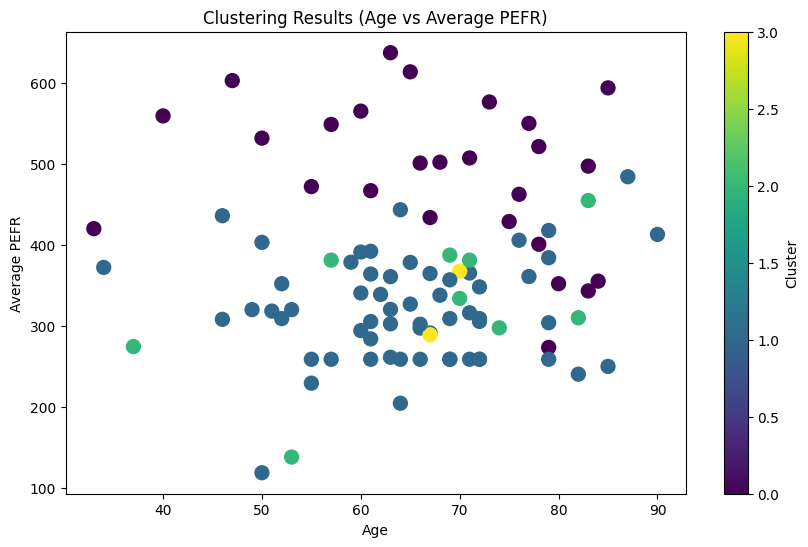

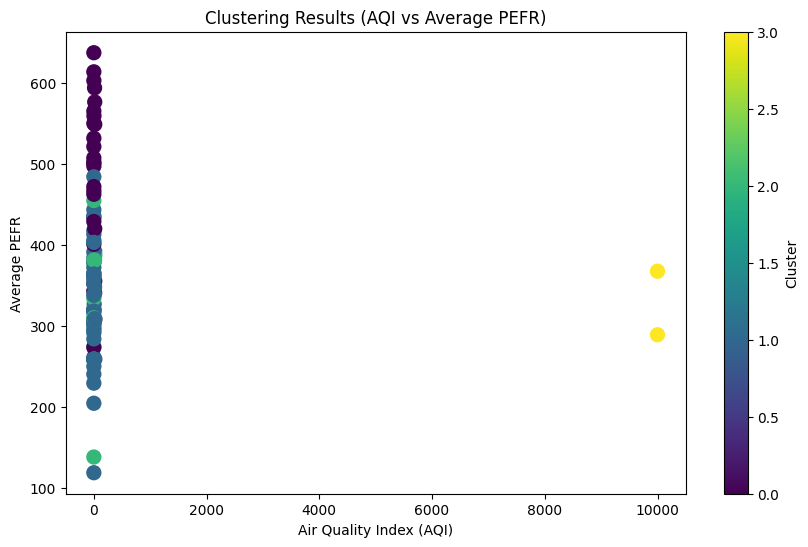

In [27]:
df['Asthma'] = df['Asthma'].map({'yes': 1, 'no': 0})

# Columns to use for clustering (including 'asthma')
clustering_columns = ['Age', 'altitude', 'mean_temperature', 'mean_humidity', 'AQI',
                      'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']

# Convert non-numeric values to NaN and ensure columns are numeric
for col in clustering_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the clustering columns
df = df.dropna(subset=clustering_columns)

# Create Age Group column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100],
                         labels=['Children', 'Young Adults', 'Middle-aged', 'Elderly'])

# Encode Age_Group as numeric for clustering
df['Age_Group_Numeric'] = df['Age_Group'].cat.codes

# Data for clustering
X = df[['Age_Group_Numeric', 'altitude', 'mean_temperature', 'mean_humidity',
        'AQI', 'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster analysis: Aggregating numeric features
cluster_analysis = df.groupby('Cluster')[
    ['altitude', 'mean_temperature', 'mean_humidity', 'AQI',
     'Average C.PEFR', 'Standard Deviation PEFR', 'Asthma']
].mean()

# Age Group distribution across clusters
age_group_counts = df.groupby('Cluster')['Age_Group'].value_counts().unstack()

# Display the results in the console
print("Cluster Analysis (Numeric Features):")
print(cluster_analysis)

print("\nAge Group Distribution Across Clusters:")
print(age_group_counts)

# Visualization: Age vs Average PEFR
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average C.PEFR'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results (Age vs Average PEFR)")
plt.xlabel("Age")
plt.ylabel("Average PEFR")
plt.colorbar(label="Cluster")
plt.show()

# Visualization: AQI vs Average PEFR
plt.figure(figsize=(10, 6))
plt.scatter(df['AQI'], df['Average C.PEFR'], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results (AQI vs Average PEFR)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Average PEFR")
plt.colorbar(label="Cluster")
plt.show()


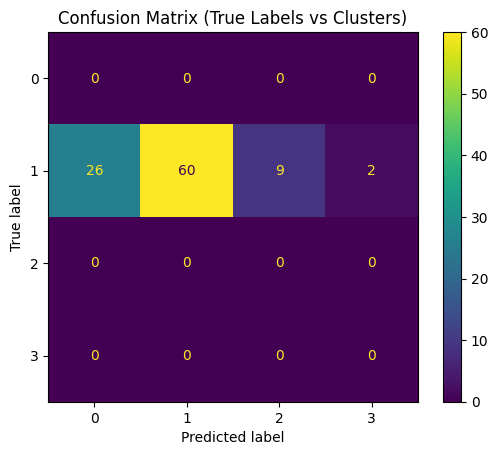

Accuracy: 0.62
Precision: 1.00
Recall: 0.62
Silhouette Score: 0.25
Davies-Bouldin Index: 1.33


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

if 'Asthma' in df.columns:
    true_labels = df['Asthma']  # Replace 'Asthma' with your actual true label column if different
    predicted_labels = df['Cluster']  # Predicted cluster labels from K-means

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure the labels for the confusion matrix are consistent
    unique_labels = sorted(set(true_labels) | set(predicted_labels))

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="viridis")
    plt.title("Confusion Matrix (True Labels vs Clusters)")
    plt.show()

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)

    # Display the scores
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
else:
    print("No 'Asthma' column found in the dataset. Cannot generate confusion matrix.")

# Evaluate clustering quality
# Silhouette Score measures how similar data points are within clusters
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])

# Davies-Bouldin Index measures the compactness and separation of clusters (lower is better)
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])

# Display clustering quality metrics
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")


In [33]:
from sklearn.metrics.pairwise import manhattan_distances, cosine_distances
distances = manhattan_distances(X)

In [34]:
print(distances)

[[  0.      94.808  256.9529 ... 301.378  295.04   295.04  ]
 [ 94.808    0.     181.0151 ... 223.33   217.568  217.568 ]
 [256.9529 181.0151   0.     ...  88.0651  93.7329  93.7329]
 ...
 [301.378  223.33    88.0651 ...   0.       6.338    6.338 ]
 [295.04   217.568   93.7329 ...   6.338    0.       0.    ]
 [295.04   217.568   93.7329 ...   6.338    0.       0.    ]]
